In [1]:
# Imports
import numpy as np
import random
import seaborn as sns
from scipy.optimize import linprog
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Definir a semente aleatória para reprodutibilidade
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

## Carregando os Dados

In [3]:
# Carregar o dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

## Dataset

In [4]:
# Visualização do dataset completo
data

,UF,emissoesCO2e,populacao,qtdContratos,totalFinanciado,areaFinanciada
0,Mato Grosso,9.245920e+07,502120,346.0,8.958880e+08,244768.85
1,Goiás,6.207678e+07,480391,161.0,3.347290e+08,73834.96
2,Minas Gerais,5.988115e+07,2418095,674.0,7.433772e+08,110545.68
3,Pará,5.283352e+07,2024601,138.0,1.274818e+08,26470.31
4,Rio Grande do Sul,4.685190e+07,1359872,208.0,4.231343e+08,81323.01
5,Mato Grosso do Sul,4.504871e+07,327142,238.0,3.884781e+08,98017.03
6,São Paulo,3.569799e+07,1413339,237.0,3.345948e+08,34015.51
7,Rondônia,3.536855e+07,339524,98.0,6.830295e+07,12936.81
8,Bahia,3.061675e+07,3291488,271.0,3.347613e+08,69763.15
9,Paraná,2.958475e+07,1264533,131.0,1.186747e+08,18660.80


## Distribuição dos Financiamentos

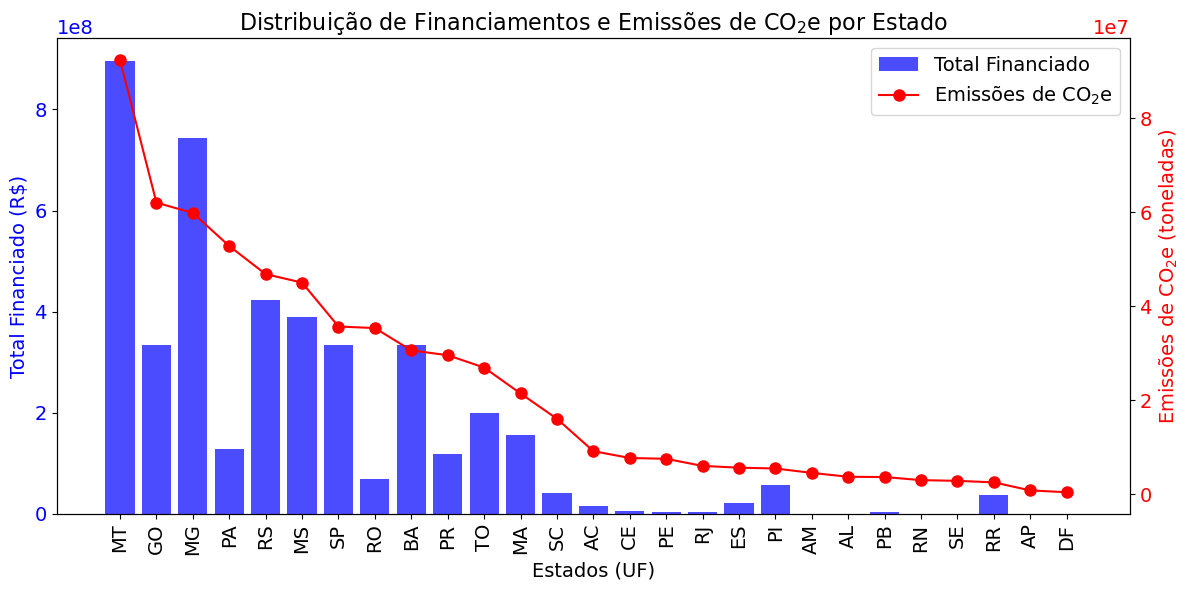

In [5]:
from matplotlib.ticker import ScalarFormatter

# Plotar a distribuição inicial de financiamentos e emissões
def plot_distribution(data):
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Dicionário de mapeamento de nomes para siglas
    siglas_estados = {
        'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM',
        'Bahia': 'BA', 'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES',
        'Goiás': 'GO', 'Maranhão': 'MA', 'Mato Grosso': 'MT', 'Mato Grosso do Sul': 'MS',
        'Minas Gerais': 'MG', 'Pará': 'PA', 'Paraíba': 'PB', 'Paraná': 'PR',
        'Pernambuco': 'PE', 'Piauí': 'PI', 'Rio de Janeiro': 'RJ', 'Rio Grande do Norte': 'RN',
        'Rio Grande do Sul': 'RS', 'Rondônia': 'RO', 'Roraima': 'RR', 'Santa Catarina': 'SC',
        'São Paulo': 'SP', 'Sergipe': 'SE', 'Tocantins': 'TO'
    }

    # Criar lista temporária com as siglas dos estados
    uf_siglas = data['UF'].map(siglas_estados)

    # Gráfico de barras para 'totalFinanciado'
    ax1.bar(
        uf_siglas,
        data['totalFinanciado'],
        color='blue',
        alpha=0.7,
        label='Total Financiado'
    )
    ax1.set_xlabel('Estados (UF)', fontsize=14)
    ax1.set_ylabel('Total Financiado (R$)', color='blue', fontsize=14)
    ax1.tick_params(axis='y', labelcolor='blue', labelsize=14)
    ax1.set_title('Distribuição de Financiamentos e Emissões de CO$_2$e por Estado', fontsize=16)
    ax1.yaxis.set_major_formatter(ScalarFormatter())
    ax1.yaxis.get_offset_text().set_fontsize(14)

    # Gráfico de linha para 'emissoesCO2e'
    ax2 = ax1.twinx()
    ax2.plot(
        uf_siglas,
        data['emissoesCO2e'],
        color='red',
        marker='o',
        label='Emissões de CO$_2$e',
        markersize=8
    )
    ax2.set_ylabel('Emissões de CO$_2$e (toneladas)', color='red', fontsize=14)
    ax2.tick_params(axis='y', labelcolor='red', labelsize=14)
    ax2.yaxis.set_major_formatter(ScalarFormatter())
    ax2.yaxis.get_offset_text().set_fontsize(14)

    # Legendas
    fig.legend(
        loc='upper right',
        bbox_to_anchor=(1, 1),
        bbox_transform=ax1.transAxes,
        fontsize=14,
        title_fontsize=14,
        markerscale=1
    )

    # Rótulos do eixo X com siglas
    ax1.set_xticks(range(len(data['UF'])))
    ax1.set_xticklabels(uf_siglas, rotation=90, fontsize=14)

    plt.tight_layout()
    plt.show()
    
plot_distribution(data)

## Estatísticas Descritivas

In [6]:
# Selecionando as variáveis de interesse
variables = ['emissoesCO2e', 'populacao', 'qtdContratos', 'totalFinanciado', 'areaFinanciada']

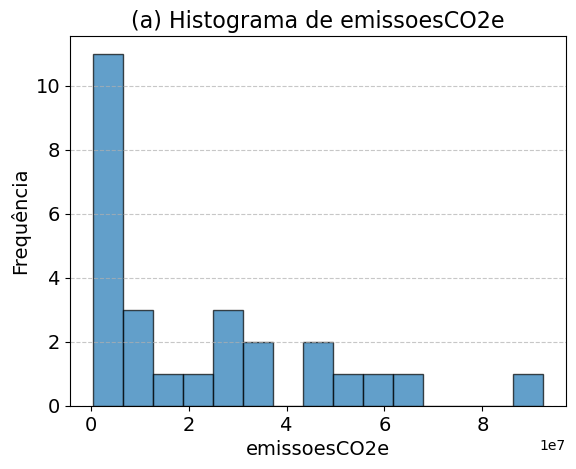

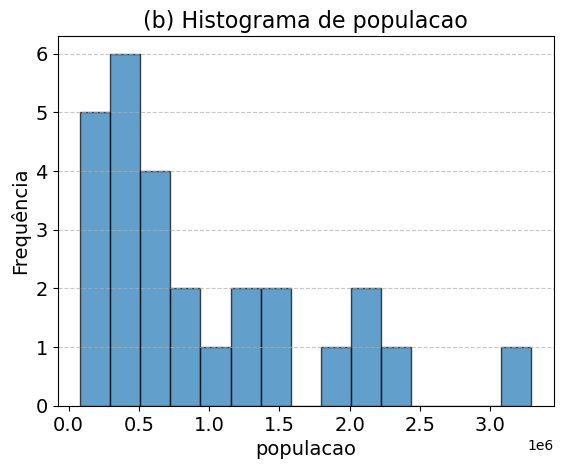

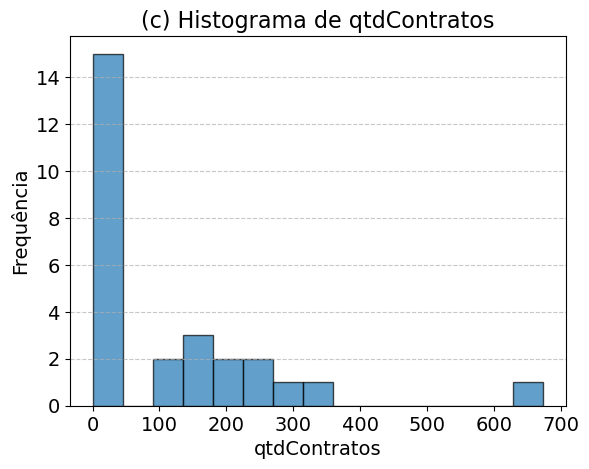

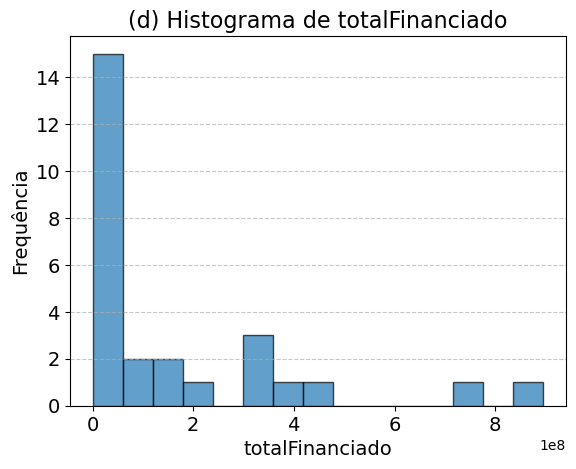

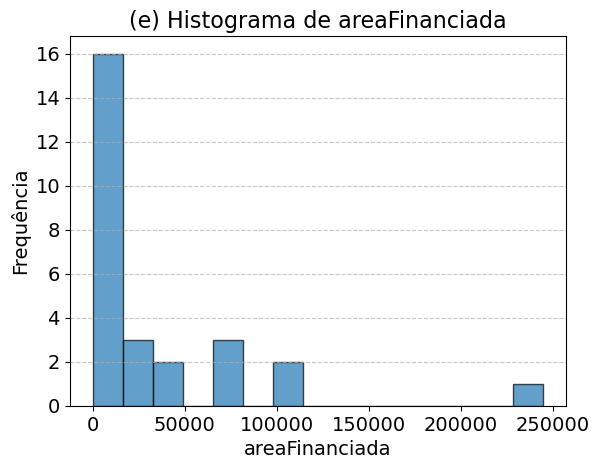

In [7]:
# Criando histogramas para cada variável com títulos ordenados
import string

# Lista de letras para ordenação (a, b, c, ...)
letters = string.ascii_lowercase

# Criando histogramas para cada variável
for idx, var in enumerate(variables):
    plt.figure()
    plt.hist(data[var], bins=15, edgecolor='black', alpha=0.7)
    plt.title(f'({letters[idx]}) Histograma de {var}', fontsize=16)  # Título com referência ordenada
    plt.xlabel(var, fontsize=14)  # Ajustar o tamanho da fonte do rótulo do eixo X
    plt.ylabel('Frequência', fontsize=14)  # Ajustar o tamanho da fonte do rótulo do eixo Y
    plt.xticks(fontsize=14)  # Ajustar o tamanho da fonte dos ticks no eixo X
    plt.yticks(fontsize=14)  # Ajustar o tamanho da fonte dos ticks no eixo Y
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [8]:
# Calculando as estatísticas descritivas
descriptive_stats = data[variables].describe()

# Convertendo a linha "count" para números inteiros
descriptive_stats.loc['count'] = descriptive_stats.loc['count'].astype(int)

# Formatando as demais linhas para uma casa decimal
descriptive_stats = descriptive_stats.applymap(lambda x: f"{x:.1f}" if isinstance(x, (float, int)) else x)

# Exibindo o resultado formatado
descriptive_stats

,emissoesCO2e,populacao,qtdContratos,totalFinanciado,areaFinanciada
count,27.0,27.0,27.0,27.0,27.0
mean,22881512.6,947123.7,112.0,159889698.4,32463.7
std,24034659.1,814029.3,151.5,235171553.4,53969.1
min,410376.2,82505.0,0.0,0.0,0.0
25%,4116425.6,338010.0,2.0,3832489.8,590.5
50%,9154465.7,607762.0,32.0,42164172.6,7194.1
75%,35533273.7,1386605.5,175.5,267506631.2,38642.0
max,92459204.1,3291488.0,674.0,895888012.2,244768.9


## Análise de Correlação

In [9]:
# Selecionar as variáveis numéricas para análise de correlação
numeric_cols = data.select_dtypes(include=[np.number])

In [10]:
# Calcular a matriz de correlação
correlation_matrix = numeric_cols.corr()

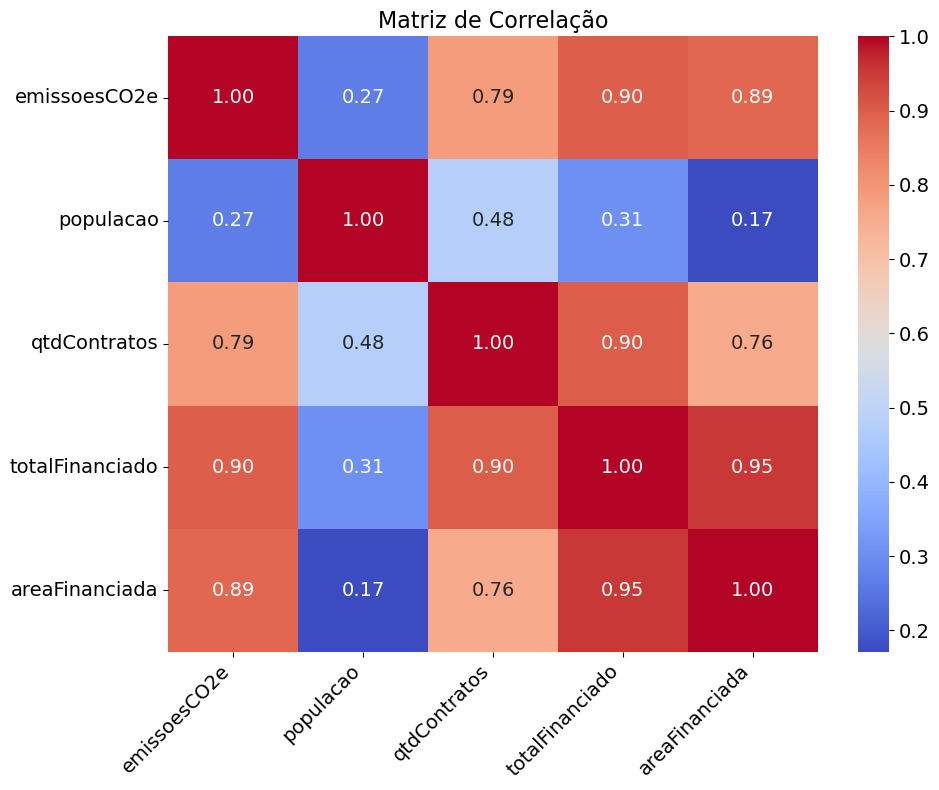

In [11]:
# Gerar o gráfico de correlação
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    cbar=True, 
    annot_kws={"fontsize": 14}  # Tamanho da fonte dos valores dentro das células
)
plt.title('Matriz de Correlação', fontsize=16)  # Ajustar o tamanho da fonte do título
plt.xticks(rotation=45, ha='right', fontsize=14)  # Ajustar o tamanho da fonte e rotação dos rótulos do eixo X
plt.yticks(rotation=0, fontsize=14)  # Ajustar o tamanho da fonte dos rótulos do eixo Y

# Ajustar a fonte da barra lateral (colorbar)
colorbar = heatmap.collections[0].colorbar
colorbar.ax.yaxis.label.set_size(14)  # Tamanho da fonte do rótulo
colorbar.ax.tick_params(labelsize=14)  # Tamanho da fonte dos ticks da barra lateral

plt.tight_layout()
plt.show()

# Fim